## Predict Smart Home Device Efficiency
### >This dataset captures smart home device usage metrics, offering insights into user behavior, device efficiency, and preferences. It includes data on device types, usage patterns, energy consumption, malfunction incidents, and user satisfaction metrics.
### >Let's build a model to predict the efficiency of the device

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('smart_home_device_usage_data.csv')
df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [3]:
df.drop('UserID',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DeviceType            5403 non-null   object 
 1   UsageHoursPerDay      5403 non-null   float64
 2   EnergyConsumption     5403 non-null   float64
 3   UserPreferences       5403 non-null   int64  
 4   MalfunctionIncidents  5403 non-null   int64  
 5   DeviceAgeMonths       5403 non-null   int64  
 6   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 295.6+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [7]:
df.columns = ['device_type','usg(hrs)/day','energy_consumption','user_preference','malfuncti_incid','device_age(m)','efficiency']

In [8]:
df.columns

Index(['device_type', 'usg(hrs)/day', 'energy_consumption', 'user_preference',
       'malfuncti_incid', 'device_age(m)', 'efficiency'],
      dtype='object')

### DeviceType: Type of smart home device (e.g., Lights, Thermostat).
### UsageHoursPerDay: Average hours per day the device is used.
### EnergyConsumption: Daily energy consumption of the device (kWh).
### UserPreferences: User preference for device usage (0 - Low, 1 - High).
### MalfunctionIncidents: Number of malfunction incidents reported.
### DeviceAgeMonths: Age of the device in months.
### SmartHomeEfficiency (Target Variable): Efficiency status of the smart home device (0 - Inefficient, 1 - Efficient).

In [9]:
df.device_type.value_counts()

device_type
Smart Speaker      1108
Camera             1101
Lights             1087
Security System    1068
Thermostat         1039
Name: count, dtype: int64

<Axes: xlabel='device_type', ylabel='count'>

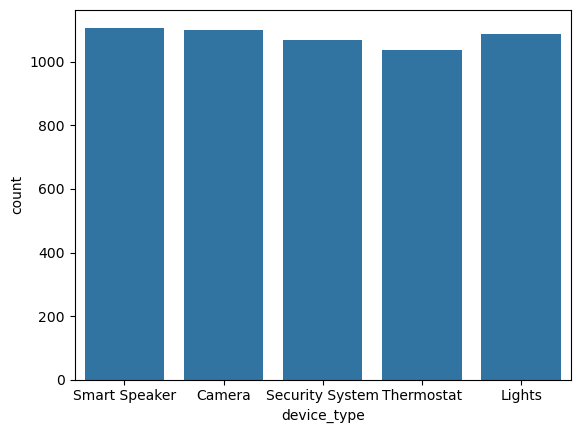

In [10]:
sns.countplot(x=df.device_type)

In [11]:
print(f"Maximum hours device can be used in a day is {np.round(df['usg(hrs)/day'].max(),0)} hours")
print(f"Minimum hours device can be used in a day is {np.round(df['usg(hrs)/day'].min(),0)} hours")

Maximum hours device can be used in a day is 24.0 hours
Minimum hours device can be used in a day is 1.0 hours


<Axes: xlabel='usg(hrs)/day', ylabel='Count'>

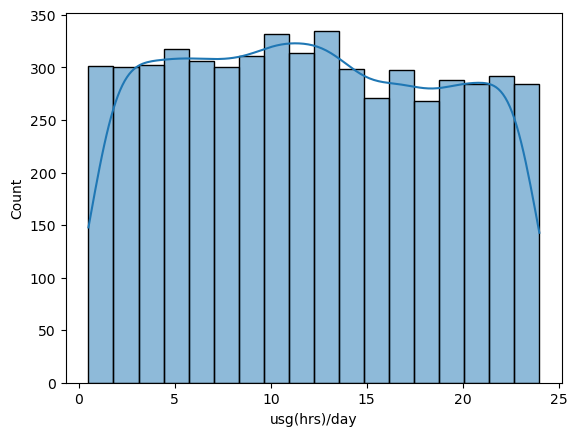

In [12]:
sns.histplot(x=df['usg(hrs)/day'],kde=True)

<Axes: xlabel='energy_consumption', ylabel='Count'>

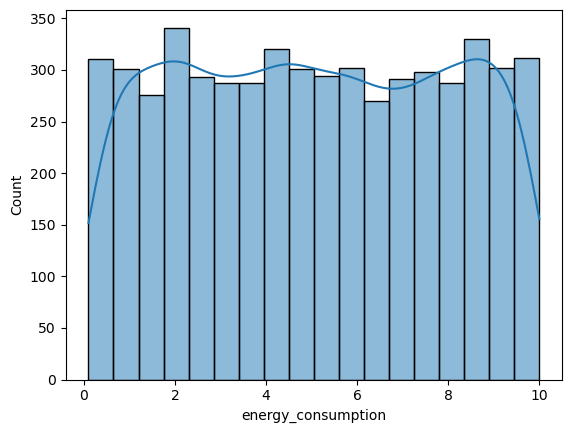

In [13]:
sns.histplot(x=df.energy_consumption,kde=True)

In [14]:
df.user_preference.value_counts()

user_preference
1    2765
0    2638
Name: count, dtype: int64

<Axes: xlabel='user_preference', ylabel='count'>

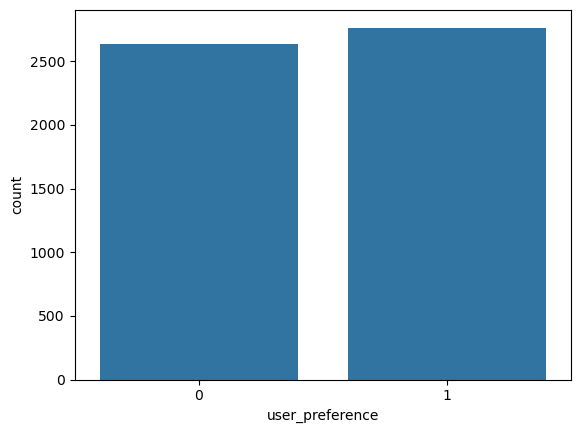

In [15]:
sns.countplot(x=df.user_preference)

In [16]:
print(f"Max no of malfunction incidents reported is: {df.malfuncti_incid.max()}")
print(f"Min no of malfunction incidents reported is: {df.malfuncti_incid.min()}")

Max no of malfunction incidents reported is: 4
Min no of malfunction incidents reported is: 0


In [17]:
df.malfuncti_incid.unique()

array([4, 0, 3, 2, 1], dtype=int64)

<Axes: xlabel='device_age(m)', ylabel='Count'>

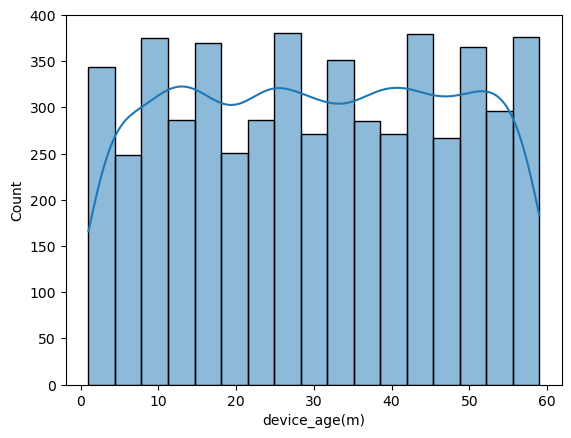

In [18]:
sns.histplot(x=df['device_age(m)'],kde=True)

In [19]:
df.efficiency.value_counts()

efficiency
0    3368
1    2035
Name: count, dtype: int64

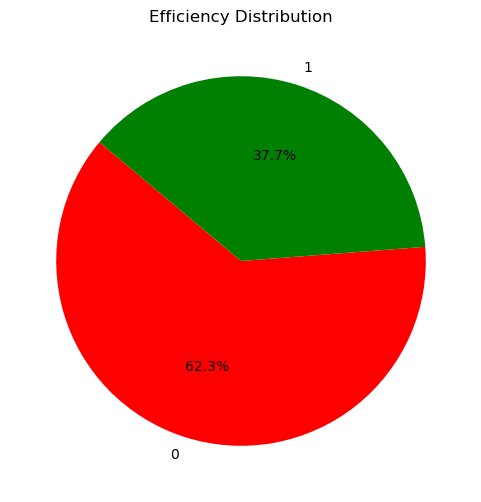

In [20]:
categories = df.efficiency.value_counts().index
values = df.efficiency.value_counts().values

plt.figure(figsize=(6, 6)) 
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])

plt.title('Efficiency Distribution')

plt.show()

In [21]:
df.head()

,device_type,usg(hrs)/day,energy_consumption,user_preference,malfuncti_incid,device_age(m),efficiency
0,Smart Speaker,15.307188,1.961607,1,4,36,1
1,Camera,19.973343,8.610689,1,0,29,1
2,Security System,18.911535,2.651777,1,0,20,1
3,Camera,7.011127,2.341653,0,3,15,0
4,Camera,22.610684,4.859069,1,3,36,1


In [22]:
df['usg(hrs)/day'] = np.round(df['usg(hrs)/day'],0)
df.energy_consumption = np.round(df.energy_consumption,3)
df.head()

,device_type,usg(hrs)/day,energy_consumption,user_preference,malfuncti_incid,device_age(m),efficiency
0,Smart Speaker,15.0,1.962,1,4,36,1
1,Camera,20.0,8.611,1,0,29,1
2,Security System,19.0,2.652,1,0,20,1
3,Camera,7.0,2.342,0,3,15,0
4,Camera,23.0,4.859,1,3,36,1


### Building pipeline

In [23]:
encoder = OneHotEncoder()
scaler = StandardScaler(with_mean=False)
enc_cols = ['device_type']
sc_cols = ['usg(hrs)/day', 'energy_consumption', 'user_preference','malfuncti_incid', 'device_age(m)']

enc_pipeline = Pipeline(steps=[
    ('encoder',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
])

sc_pipeline = Pipeline(steps=[
    ('scaler',StandardScaler(with_mean=False))
])

preprocessor = ColumnTransformer([
    ('enc_pipeline',enc_pipeline,enc_cols),
    ('sc_pipeline',sc_pipeline,sc_cols)
])

In [24]:
X = df.drop('efficiency',axis=1)
y = df.efficiency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Trying out different models

In [26]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [27]:
report = {}
print('Modes Outcomes')
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Modes Outcomes
Learning rate set to 0.018724
0:	learn: 0.6693012	total: 689ms	remaining: 11m 28s
1:	learn: 0.6462229	total: 712ms	remaining: 5m 55s
2:	learn: 0.6249659	total: 731ms	remaining: 4m 2s
3:	learn: 0.6039808	total: 743ms	remaining: 3m 4s
4:	learn: 0.5849072	total: 755ms	remaining: 2m 30s
5:	learn: 0.5672347	total: 763ms	remaining: 2m 6s
6:	learn: 0.5497935	total: 772ms	remaining: 1m 49s
7:	learn: 0.5334824	total: 781ms	remaining: 1m 36s
8:	learn: 0.5178400	total: 787ms	remaining: 1m 26s
9:	learn: 0.5033059	total: 794ms	remaining: 1m 18s
10:	learn: 0.4888542	total: 801ms	remaining: 1m 12s
11:	learn: 0.4751250	total: 1.32s	remaining: 1m 48s
12:	learn: 0.4633757	total: 1.34s	remaining: 1m 42s
13:	learn: 0.4508997	total: 1.36s	remaining: 1m 35s
14:	learn: 0.4397985	total: 1.37s	remaining: 1m 29s
15:	learn: 0.4306450	total: 1.38s	remaining: 1m 25s
16:	learn: 0.4210491	total: 1.39s	remaining: 1m 20s
17:	learn: 0.4110230	total: 1.4s	remaining: 1m 16s
18:	learn: 0.4015591	total: 1.4s

160:	learn: 0.1876665	total: 2.11s	remaining: 11s
161:	learn: 0.1874958	total: 2.11s	remaining: 10.9s
162:	learn: 0.1873395	total: 2.12s	remaining: 10.9s
163:	learn: 0.1871704	total: 2.13s	remaining: 10.8s
164:	learn: 0.1869982	total: 2.13s	remaining: 10.8s
165:	learn: 0.1868280	total: 2.14s	remaining: 10.7s
166:	learn: 0.1866820	total: 2.15s	remaining: 10.7s
167:	learn: 0.1864633	total: 2.15s	remaining: 10.7s
168:	learn: 0.1863478	total: 2.16s	remaining: 10.6s
169:	learn: 0.1862260	total: 2.16s	remaining: 10.6s
170:	learn: 0.1860720	total: 2.17s	remaining: 10.5s
171:	learn: 0.1859810	total: 2.18s	remaining: 10.5s
172:	learn: 0.1858505	total: 2.18s	remaining: 10.4s
173:	learn: 0.1857301	total: 2.19s	remaining: 10.4s
174:	learn: 0.1855634	total: 2.19s	remaining: 10.3s
175:	learn: 0.1854661	total: 2.2s	remaining: 10.3s
176:	learn: 0.1852928	total: 2.2s	remaining: 10.2s
177:	learn: 0.1850994	total: 2.21s	remaining: 10.2s
178:	learn: 0.1849109	total: 2.21s	remaining: 10.1s
179:	learn: 0.18

352:	learn: 0.1653283	total: 3.08s	remaining: 5.64s
353:	learn: 0.1652594	total: 3.08s	remaining: 5.63s
354:	learn: 0.1651233	total: 3.09s	remaining: 5.61s
355:	learn: 0.1650172	total: 3.09s	remaining: 5.6s
356:	learn: 0.1649066	total: 3.12s	remaining: 5.62s
357:	learn: 0.1648051	total: 3.12s	remaining: 5.6s
358:	learn: 0.1647241	total: 3.13s	remaining: 5.59s
359:	learn: 0.1646108	total: 3.13s	remaining: 5.57s
360:	learn: 0.1644885	total: 3.14s	remaining: 5.56s
361:	learn: 0.1644182	total: 3.15s	remaining: 5.54s
362:	learn: 0.1643451	total: 3.15s	remaining: 5.53s
363:	learn: 0.1642451	total: 3.15s	remaining: 5.51s
364:	learn: 0.1641098	total: 3.16s	remaining: 5.5s
365:	learn: 0.1640812	total: 3.17s	remaining: 5.48s
366:	learn: 0.1639692	total: 3.17s	remaining: 5.47s
367:	learn: 0.1639132	total: 3.17s	remaining: 5.45s
368:	learn: 0.1638112	total: 3.18s	remaining: 5.44s
369:	learn: 0.1637278	total: 3.18s	remaining: 5.42s
370:	learn: 0.1636423	total: 3.19s	remaining: 5.41s
371:	learn: 0.1

539:	learn: 0.1476665	total: 4.05s	remaining: 3.45s
540:	learn: 0.1476207	total: 4.06s	remaining: 3.44s
541:	learn: 0.1475578	total: 4.06s	remaining: 3.43s
542:	learn: 0.1474903	total: 4.07s	remaining: 3.42s
543:	learn: 0.1474039	total: 4.07s	remaining: 3.41s
544:	learn: 0.1473328	total: 4.08s	remaining: 3.4s
545:	learn: 0.1472872	total: 4.08s	remaining: 3.4s
546:	learn: 0.1471795	total: 4.09s	remaining: 3.38s
547:	learn: 0.1471272	total: 4.09s	remaining: 3.38s
548:	learn: 0.1470710	total: 4.1s	remaining: 3.37s
549:	learn: 0.1470293	total: 4.1s	remaining: 3.36s
550:	learn: 0.1469429	total: 4.11s	remaining: 3.35s
551:	learn: 0.1468445	total: 4.11s	remaining: 3.34s
552:	learn: 0.1467594	total: 4.12s	remaining: 3.33s
553:	learn: 0.1466199	total: 4.12s	remaining: 3.32s
554:	learn: 0.1465131	total: 4.13s	remaining: 3.31s
555:	learn: 0.1464319	total: 4.13s	remaining: 3.3s
556:	learn: 0.1463455	total: 4.14s	remaining: 3.29s
557:	learn: 0.1462781	total: 4.14s	remaining: 3.28s
558:	learn: 0.146

698:	learn: 0.1360728	total: 4.84s	remaining: 2.09s
699:	learn: 0.1359758	total: 4.85s	remaining: 2.08s
700:	learn: 0.1359448	total: 4.85s	remaining: 2.07s
701:	learn: 0.1358774	total: 4.86s	remaining: 2.06s
702:	learn: 0.1358339	total: 4.87s	remaining: 2.06s
703:	learn: 0.1357471	total: 4.87s	remaining: 2.05s
704:	learn: 0.1357193	total: 4.88s	remaining: 2.04s
705:	learn: 0.1356576	total: 4.88s	remaining: 2.03s
706:	learn: 0.1355763	total: 4.88s	remaining: 2.02s
707:	learn: 0.1355089	total: 4.89s	remaining: 2.02s
708:	learn: 0.1354749	total: 4.89s	remaining: 2.01s
709:	learn: 0.1354037	total: 4.9s	remaining: 2s
710:	learn: 0.1353408	total: 4.9s	remaining: 1.99s
711:	learn: 0.1352843	total: 4.91s	remaining: 1.99s
712:	learn: 0.1352213	total: 4.91s	remaining: 1.98s
713:	learn: 0.1351815	total: 4.92s	remaining: 1.97s
714:	learn: 0.1350892	total: 4.92s	remaining: 1.96s
715:	learn: 0.1350338	total: 4.93s	remaining: 1.96s
716:	learn: 0.1349538	total: 4.93s	remaining: 1.95s
717:	learn: 0.134

859:	learn: 0.1258592	total: 5.63s	remaining: 917ms
860:	learn: 0.1257993	total: 5.64s	remaining: 910ms
861:	learn: 0.1257578	total: 5.64s	remaining: 903ms
862:	learn: 0.1257288	total: 5.65s	remaining: 896ms
863:	learn: 0.1256685	total: 5.65s	remaining: 890ms
864:	learn: 0.1256197	total: 5.66s	remaining: 883ms
865:	learn: 0.1255590	total: 5.66s	remaining: 876ms
866:	learn: 0.1254971	total: 5.67s	remaining: 869ms
867:	learn: 0.1254085	total: 5.67s	remaining: 862ms
868:	learn: 0.1253096	total: 5.68s	remaining: 856ms
869:	learn: 0.1252504	total: 5.68s	remaining: 849ms
870:	learn: 0.1252128	total: 5.68s	remaining: 842ms
871:	learn: 0.1251611	total: 5.69s	remaining: 835ms
872:	learn: 0.1251353	total: 5.69s	remaining: 828ms
873:	learn: 0.1250518	total: 5.7s	remaining: 822ms
874:	learn: 0.1249928	total: 5.7s	remaining: 815ms
875:	learn: 0.1249201	total: 5.71s	remaining: 808ms
876:	learn: 0.1248469	total: 5.71s	remaining: 801ms
877:	learn: 0.1247800	total: 5.72s	remaining: 795ms
878:	learn: 0.

### Saving the best model

In [28]:
classifier = models[best_model_name]
import pickle
data = {'model':classifier,'preprocessor':preprocessor}
with open('smarthome.pkl','wb') as file:
    pickle.dump(data,file)